In [9]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont,Cluster_fit, Error
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [4]:
metal=np.arange(0.002,0.031,0.001)
# age=np.arange(7.0,14.1,.1)
age = [np.arange(5,13.1,.1),np.arange(4,13.1,.1),np.arange(9,14.1,.1),
       np.arange(9,14.1,.1),np.arange(9,14.1,.1),np.arange(9,14.1,.1)]
tau=[0]
# tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
#      9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

M,A=np.meshgrid(metal,age)

cluster=[6528,6553,5927,6304,6388,6441]

[[ 6 15]]
Best fit model is 5.6 Gyr and 0.017 Z


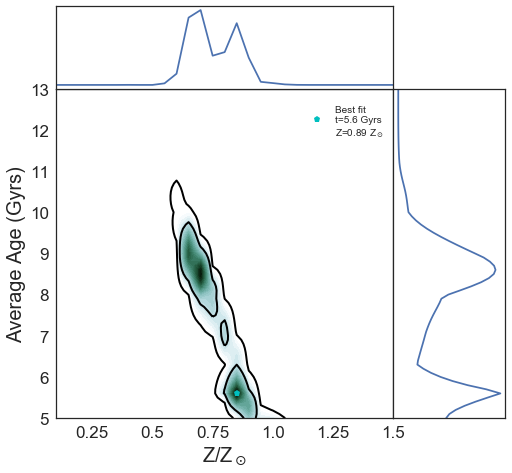

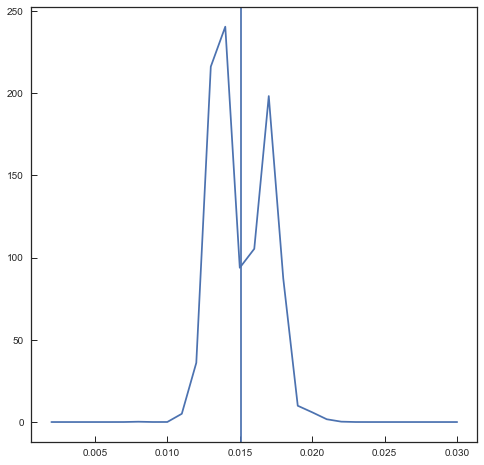

[[ 0 28]]
Best fit model is 5.0 Gyr and 0.03 Z


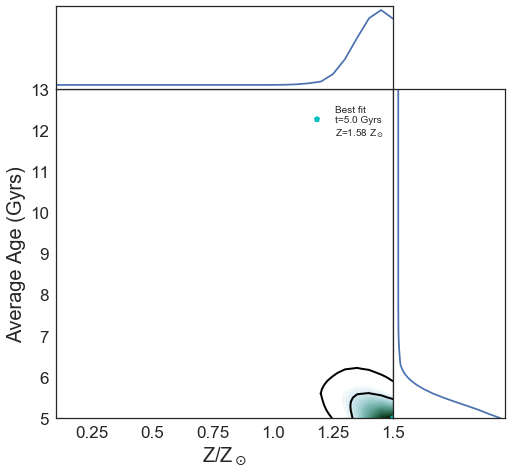

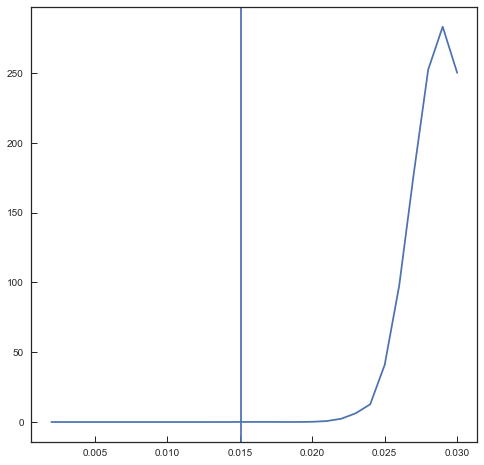

[[ 0 26]]
Best fit model is 5.0 Gyr and 0.028 Z


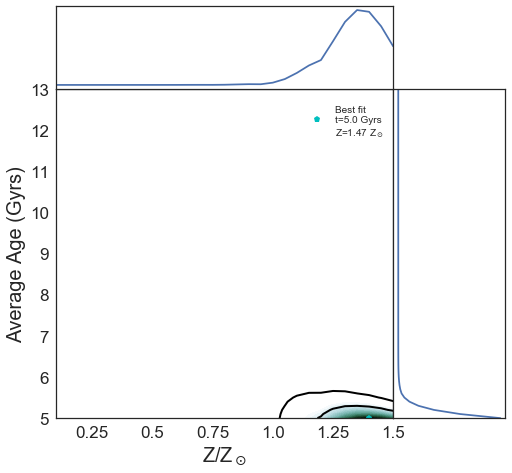

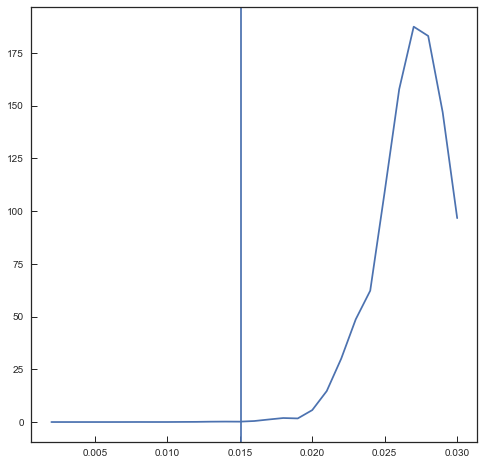

In [5]:
%matplotlib inline
rshift=[1.1,1.2,1.35]
age=np.arange(5,13.1,.1)
# mfits = [-0.1, -0.2, -0.64, -0.66, -0.68, -0.65]
for i in range(len(rshift)):
    ngc=Cluster('../clusters/ngc6528_griz_err_%s.npy' % rshift[i],rshift[i])
    ngc.Analyze_fit('../chidat/ngc6528_err_%s_chidata.fits' % rshift[i],metal,age,tau)
    # ngc.Analyze_fit_FC('../chidat/ngc%s_err_al_cont_chidata.fits' % cluster[i],
    #                    '../chidat/ngc%s_err_al_feat_chidata.fits' % cluster[i],metal,age[i],tau)
    ngc.Plot_2D_likelihood()
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**(-.1)*.019)
    plt.show()
    plt.close()

[[30 23]]
Best fit model is 3.5 Gyr and 0.025 Z


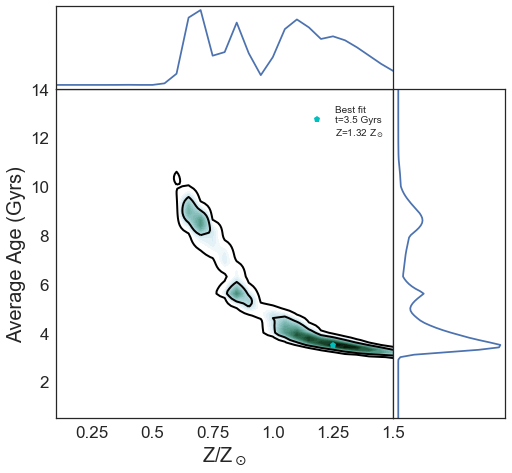

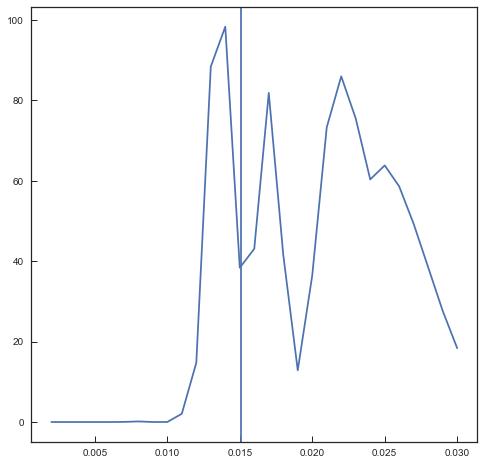

[[39 28]]
Best fit model is 4.4 Gyr and 0.03 Z


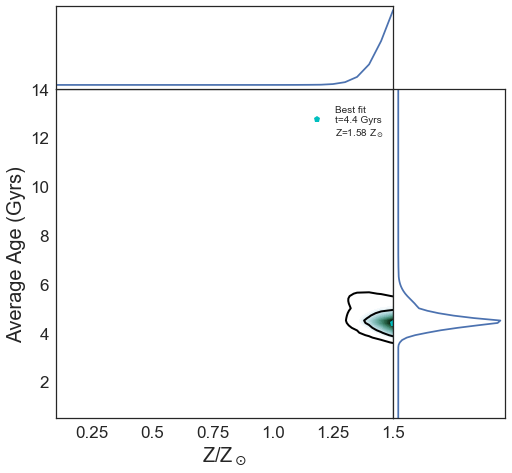

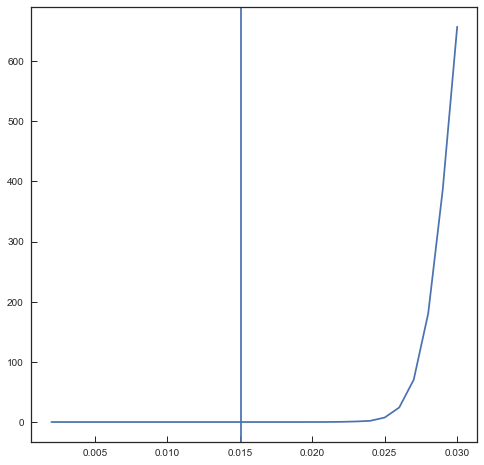

[[31 28]]
Best fit model is 3.6 Gyr and 0.03 Z


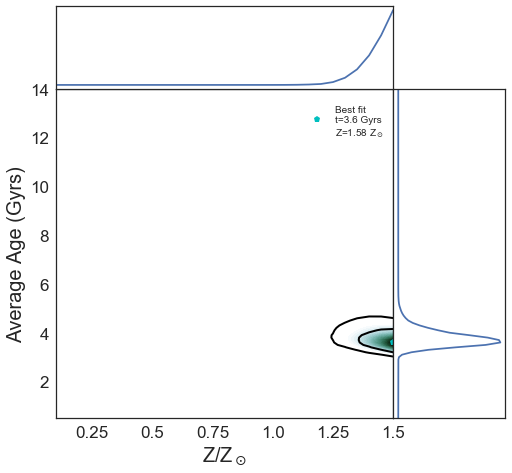

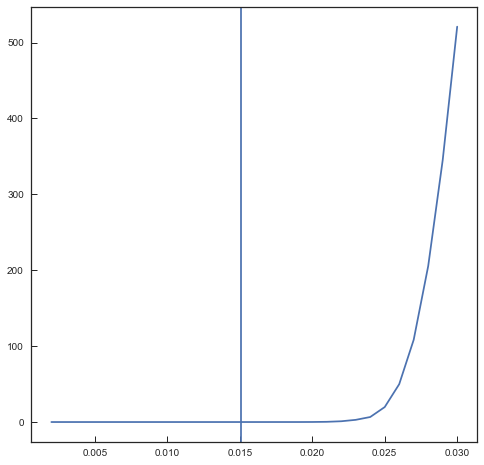

In [9]:
%matplotlib inline
rshift=[1.1,1.2,1.35]
age=np.arange(.5,14.1,.1)
# mfits = [-0.1, -0.2, -0.64, -0.66, -0.68, -0.65]
for i in range(len(rshift)):
    ngc=Cluster('../clusters/ngc6528_griz_err_%s.npy' % rshift[i],rshift[i])
    ngc.Analyze_fit('../chidat/ngc6528_err_%s_fa_chidata.fits' % rshift[i],metal,age,tau)
    # ngc.Analyze_fit_FC('../chidat/ngc%s_err_al_cont_chidata.fits' % cluster[i],
    #                    '../chidat/ngc%s_err_al_feat_chidata.fits' % cluster[i],metal,age[i],tau)
    ngc.Plot_2D_likelihood()
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**(-.1)*.019)
    plt.show()
    plt.close()

(29, 136)
(136,)
[[109  11]]
Best fit model is 11.4 Gyr and 0.013 Z
(29, 136)
(136,)
[[107  27]]
Best fit model is 11.2 Gyr and 0.029 Z


(29, 136)
(136,)
[[105  27]]
Best fit model is 11.0 Gyr and 0.029 Z


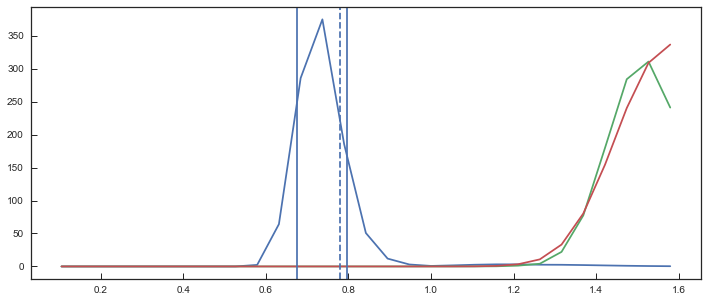

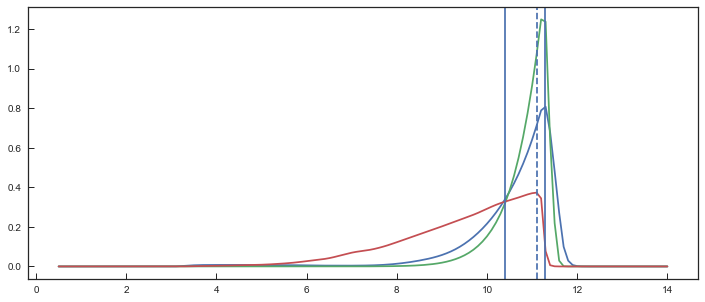

(29, 136)
(136,)
[[100   9]]
Best fit model is 10.5 Gyr and 0.011 Z
(29, 136)
(136,)
[[102  28]]
Best fit model is 10.7 Gyr and 0.03 Z


(29, 136)
(136,)
[[92 28]]
Best fit model is 9.7 Gyr and 0.03 Z


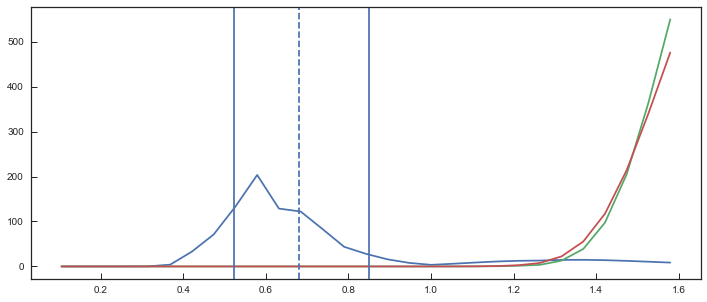

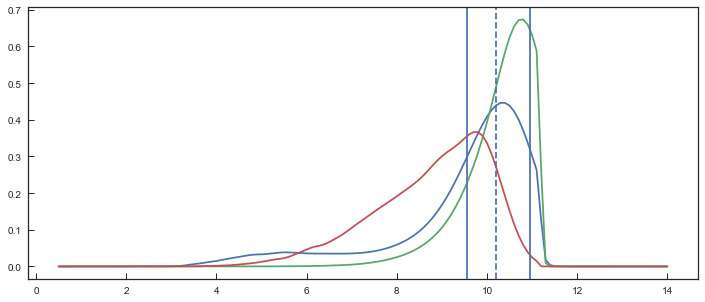

In [14]:
%matplotlib inline
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
age=np.arange(.5,14.1,.1)

rshift=[1.1,1.2,1.35]
# cluster=[6528, 6553,5927,6304,6388,6441]
cluster=[6528, 6553]
mmeas = np.array([.78,.68])
ameas = np.array([11.1,10.2])

for i in range(len(cluster)):
    mp = []
    ap = []
    for ii in range(len(rshift)):
        ngc=Cluster('../clusters/ngc%s_griz_err_%s.npy' % (cluster[i],rshift[ii]),rshift[ii])
        ngc.Analyze_fit('../chidat/ngc%s_err_al_fa_%s_chidata.fits' % (cluster[i],rshift[ii]),metal,age,tau)
        mp.append(ngc.MP)
        ap.append(ngc.AP)
        # ngc.Plot_2D_likelihood()
        # plt.figure(figsize=[8,8])
        # plt.plot(metal,ngc.MP)
        # plt.axvline(10**(-.1)*.019)
        # plt.show()
        # plt.close()
    
    merrl,merrh=Error(mp[0],metal)
    
    plt.figure(figsize=[12,5])
    plt.plot(metal/.019,mp[0])
    plt.plot(metal/.019,mp[1])
    plt.plot(metal/.019,mp[2])
    plt.axvline(mmeas[i],linestyle='--')
    plt.axvline(merrl/.019)
    plt.axvline(merrh/.019)
    plt.show()
    plt.close()
    
    aerrl,aerrh=Error(ap[1],age)

    
    plt.figure(figsize=[12,5])
    plt.plot(age,ap[0])
    plt.plot(age,ap[1])
    plt.plot(age,ap[2])
    plt.axvline(ameas[i],linestyle='--')
    plt.axvline(aerrl)
    plt.axvline(aerrh)
    plt.show()
    plt.close()

[0]
(29, 136)
(136,)
[[47  9]]
Best fit model is 5.2 Gyr and 0.011 Z


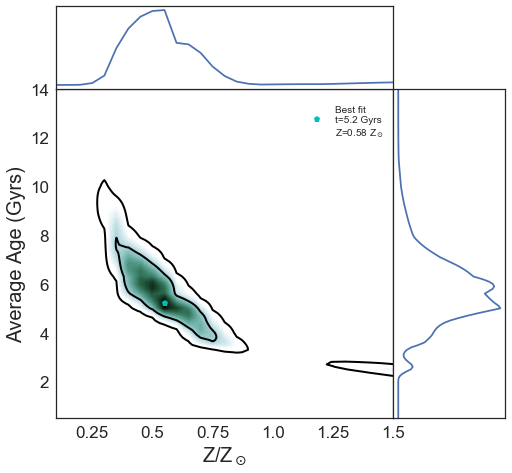

[0, 8.0]
(29, 136)
(136,)
[[47  9]]
Best fit model is 5.2 Gyr and 0.011 Z


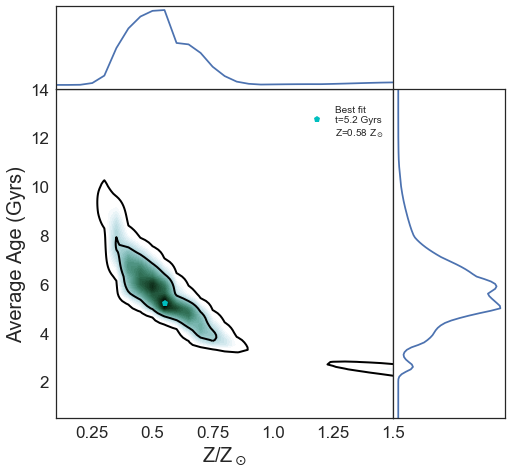

[0, 8.0, 8.3]


(29, 136)
(136,)
[[47  9]]
Best fit model is 5.2 Gyr and 0.011 Z


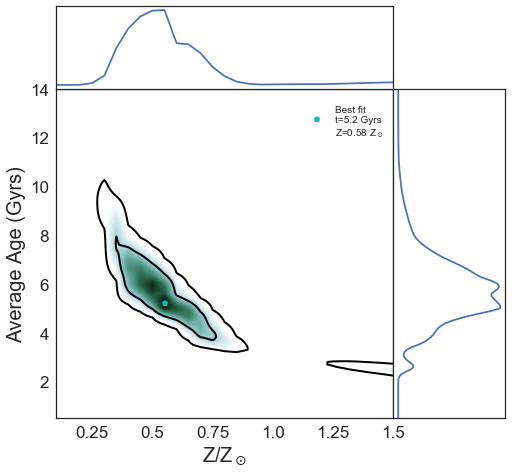

[0, 8.0, 8.3, 8.48]
(29, 136)
(136,)
[[47  9]]
Best fit model is 5.2 Gyr and 0.011 Z


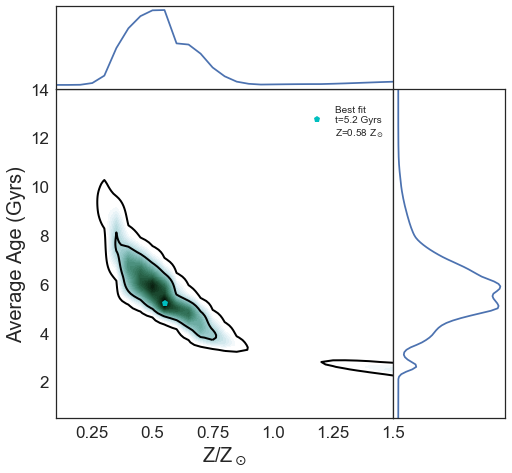

[0, 8.0, 8.3, 8.48, 8.6]
(29, 136)
(136,)
[[47  9]]
Best fit model is 5.2 Gyr and 0.011 Z


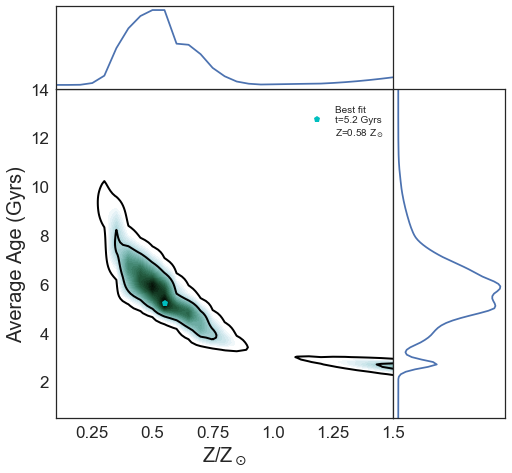

[0, 8.0, 8.3, 8.48, 8.6, 8.7]
(29, 136)
(136,)
[[23 28]]
Best fit model is 2.8 Gyr and 0.03 Z


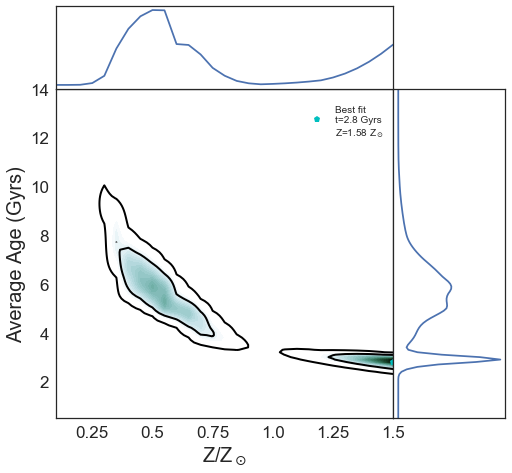

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78]
(29, 136)
(136,)
[[26 28]]
Best fit model is 3.1 Gyr and 0.03 Z


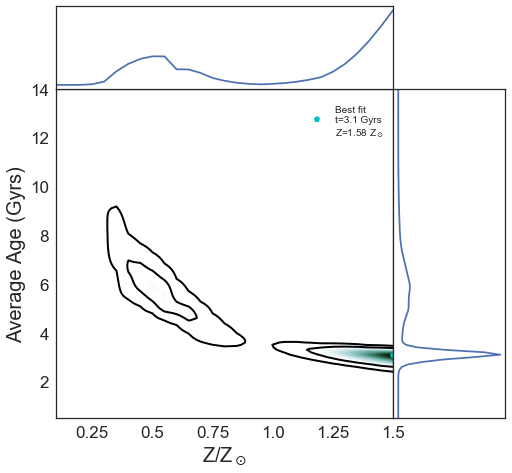

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85]
(29, 136)
(136,)
[[28 28]]
Best fit model is 3.3 Gyr and 0.03 Z


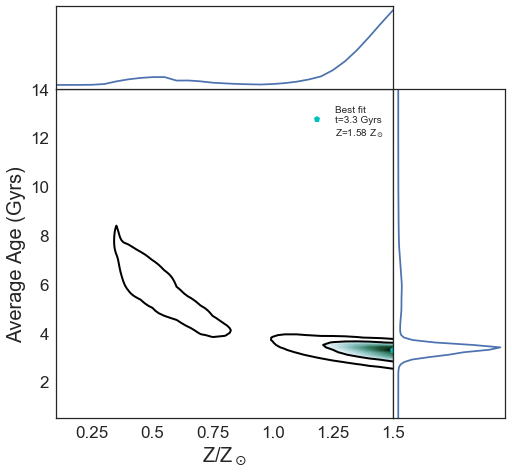

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9]
(29, 136)
(136,)
[[29 28]]
Best fit model is 3.4 Gyr and 0.03 Z


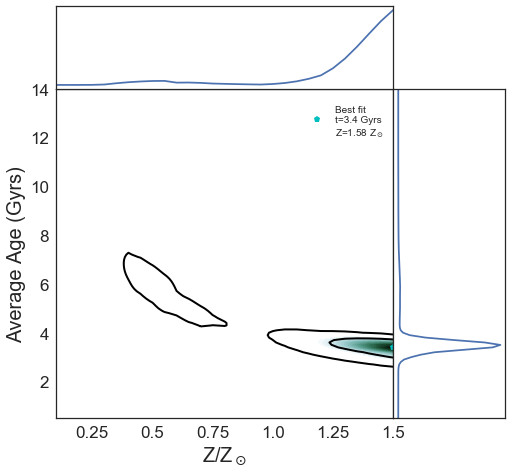

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95]
(29, 136)
(136,)
[[30 28]]
Best fit model is 3.5 Gyr and 0.03 Z


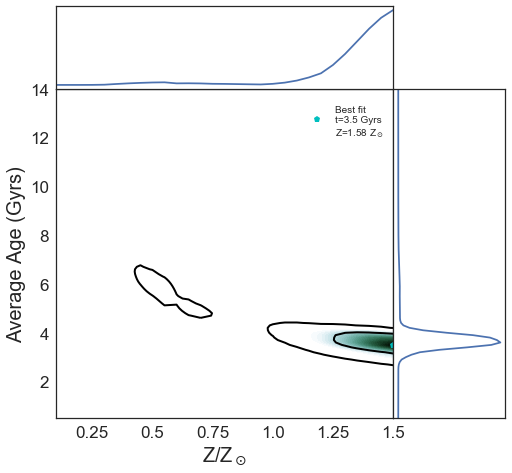

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0]
(29, 136)
(136,)
[[33 28]]
Best fit model is 3.8 Gyr and 0.03 Z


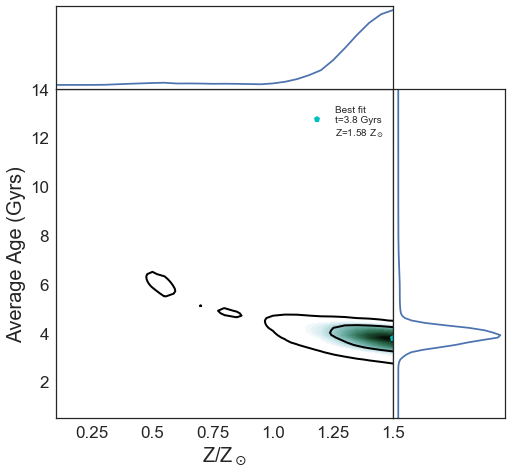

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04]
(29, 136)
(136,)
[[36 27]]
Best fit model is 4.1 Gyr and 0.029 Z


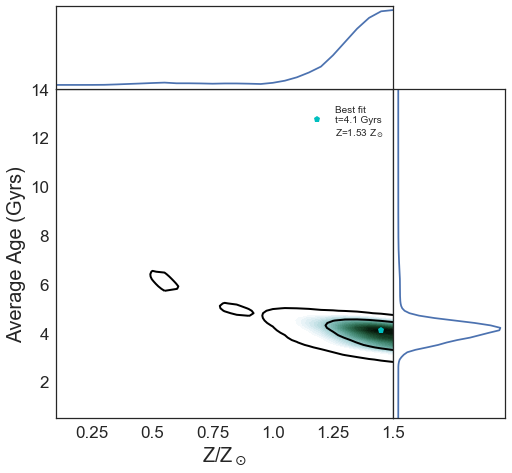

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08]
(29, 136)
(136,)
[[38 27]]
Best fit model is 4.3 Gyr and 0.029 Z


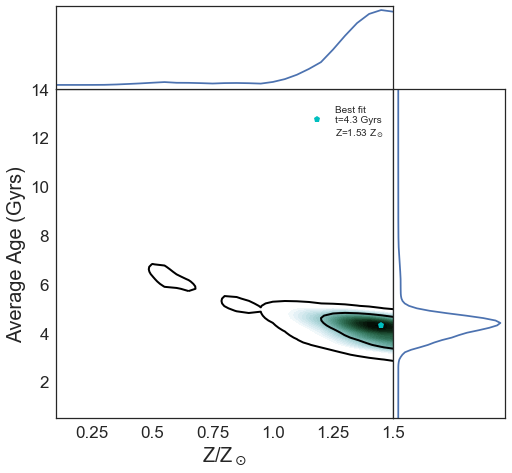

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11]


(29, 136)
(136,)
[[40 26]]
Best fit model is 4.5 Gyr and 0.028 Z


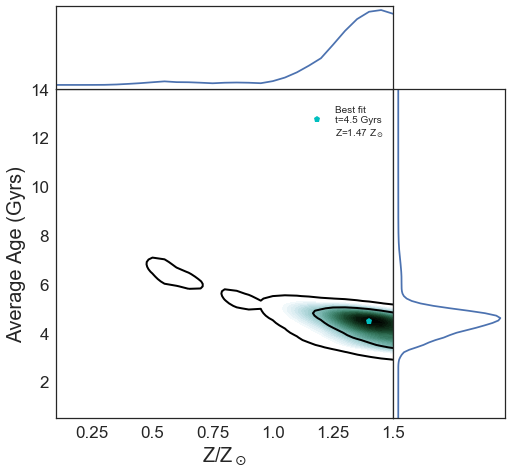

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15]
(29, 136)
(136,)
[[42 26]]
Best fit model is 4.7 Gyr and 0.028 Z


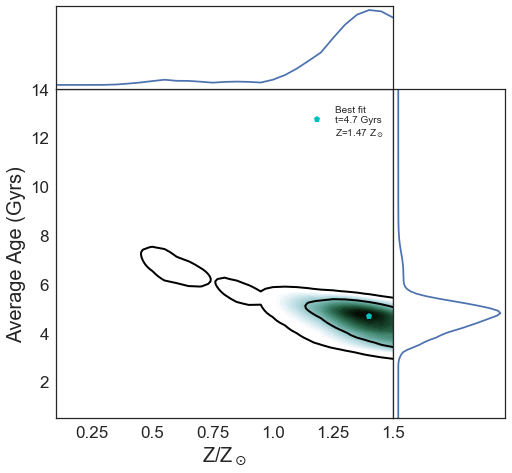

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18]
(29, 136)
(136,)
[[43 26]]
Best fit model is 4.8 Gyr and 0.028 Z


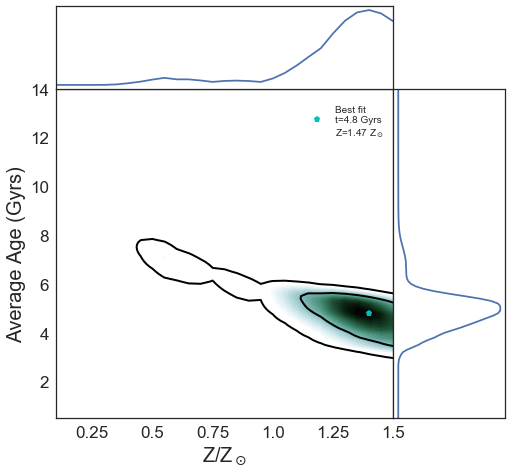

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2]
(29, 136)
(136,)
[[43 26]]
Best fit model is 4.8 Gyr and 0.028 Z


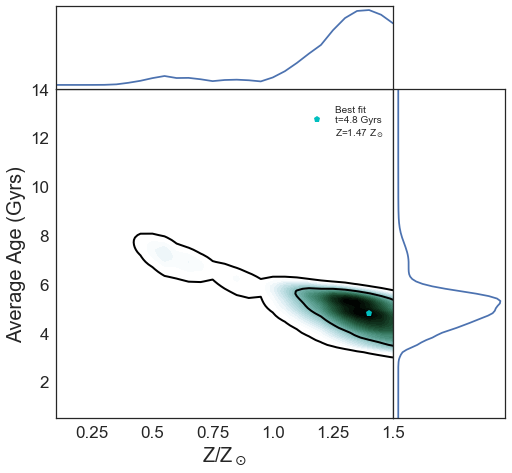

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23]
(29, 136)
(136,)
[[50 24]]
Best fit model is 5.5 Gyr and 0.026 Z


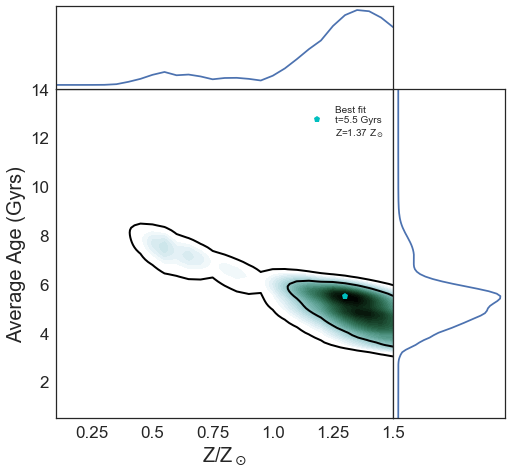

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26]
(29, 136)
(136,)
[[50 24]]
Best fit model is 5.5 Gyr and 0.026 Z


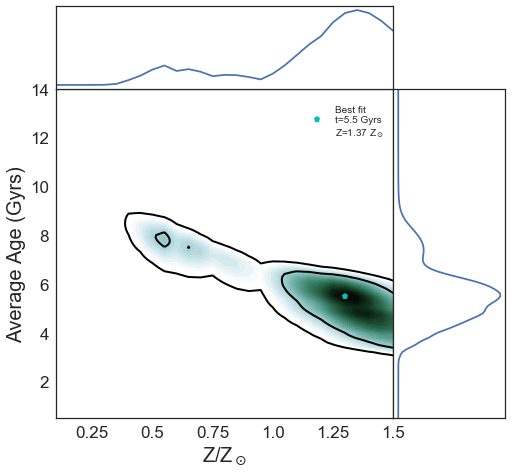

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28]
(29, 136)
(136,)
[[50 24]]
Best fit model is 5.5 Gyr and 0.026 Z


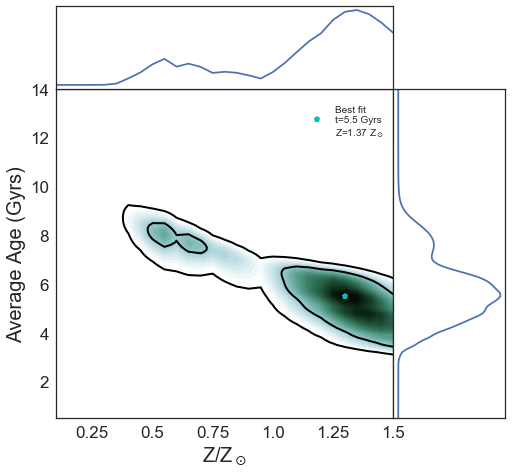

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3]
(29, 136)
(136,)
[[50 24]]
Best fit model is 5.5 Gyr and 0.026 Z


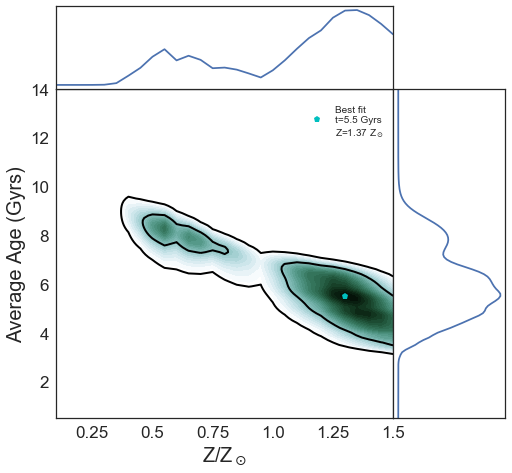

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32]
(29, 136)
(136,)
[[50 24]]
Best fit model is 5.5 Gyr and 0.026 Z


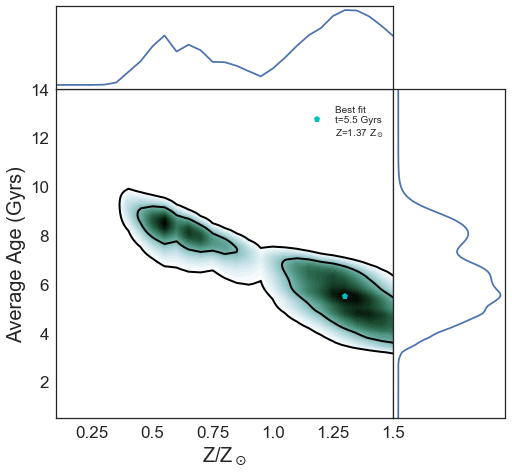

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34]
(29, 136)
(136,)
[[82  9]]
Best fit model is 8.7 Gyr and 0.011 Z


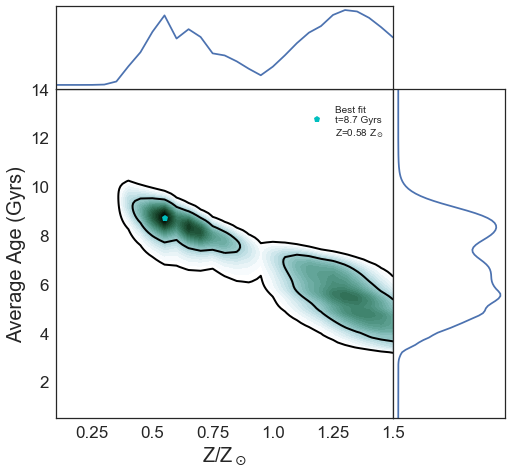

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36]
(29, 136)
(136,)
[[85  9]]
Best fit model is 9.0 Gyr and 0.011 Z


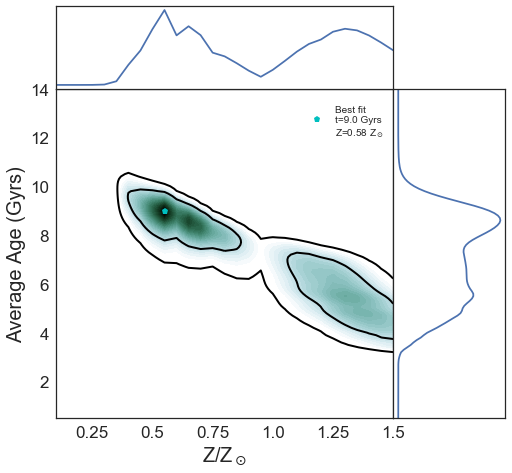

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38]


(29, 136)
(136,)
[[87  9]]
Best fit model is 9.2 Gyr and 0.011 Z


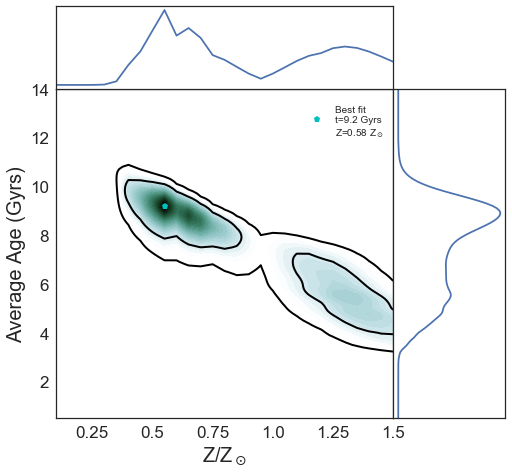

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38, 9.4]
(29, 136)
(136,)
[[89  9]]
Best fit model is 9.4 Gyr and 0.011 Z


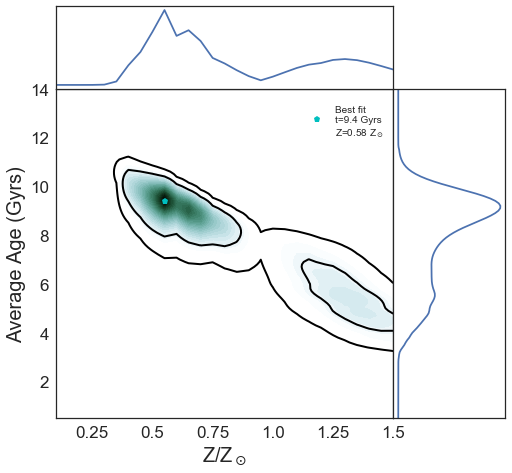

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41]
(29, 136)
(136,)
[[91  9]]
Best fit model is 9.6 Gyr and 0.011 Z


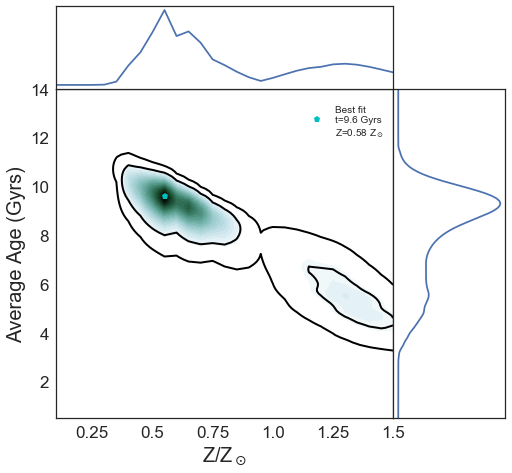

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43]
(29, 136)
(136,)
[[93  9]]
Best fit model is 9.8 Gyr and 0.011 Z


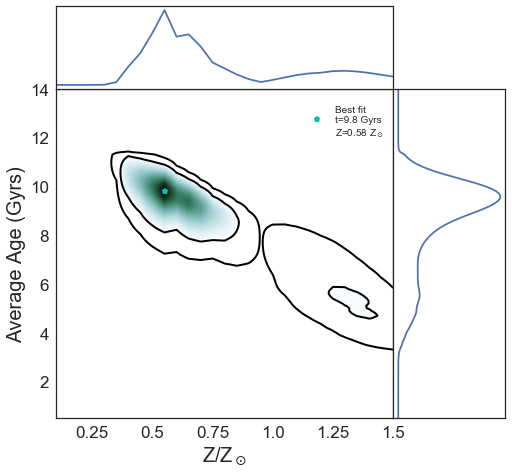

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45]
(29, 136)
(136,)
[[96  9]]
Best fit model is 10.1 Gyr and 0.011 Z


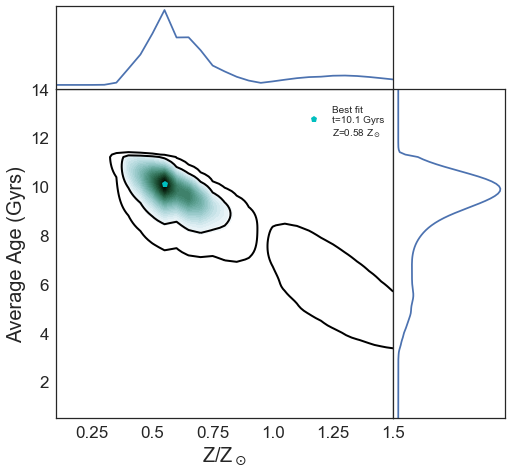

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46]
(29, 136)
(136,)
[[97  9]]
Best fit model is 10.2 Gyr and 0.011 Z


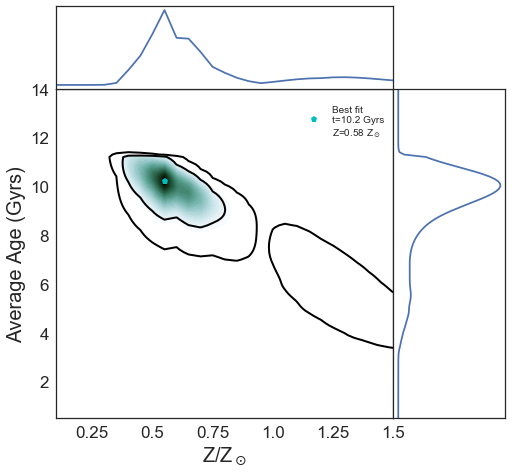

[0, 8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28, 9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
(29, 136)
(136,)
[[100   9]]
Best fit model is 10.5 Gyr and 0.011 Z


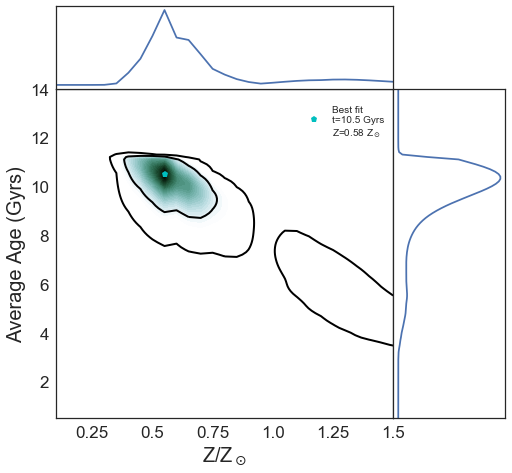

In [7]:
%matplotlib inline
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
age=np.arange(.5,14.1,.1)

for i in range(len(tau)):
    print tau[0:i+1]
    ngc=Cluster('../clusters/ngc6553_griz_err_1.1.npy',1.1)
    ngc.Analyze_fit('../chidat/ngc6553_err_al_fa_1.1_chidata.fits' ,metal,age,tau,cut_tau=True,tau_new=tau[0:i+1])
    ngc.Plot_2D_likelihood()